# Importing the Required Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../DataSet/okcupid_profiles.csv')

In [3]:
df = df.iloc[:,0:21]

In [4]:
df.head()

,age,status,sex,orientation,body_type,diet,drinks,drugs,education,ethnicity,...,income,job,last_online,location,offspring,pets,religion,sign,smokes,speaks
0,22,single,m,straight,a little extra,strictly anything,socially,never,working on college/university,"asian, white",...,-1,transportation,2012-06-28-20-30,"south san francisco, california","doesn't have kids, but might want them",likes dogs and likes cats,agnosticism and very serious about it,gemini,sometimes,english
1,35,single,m,straight,average,mostly other,often,sometimes,working on space camp,white,...,80000,hospitality / travel,2012-06-29-21-41,"oakland, california","doesn't have kids, but might want them",likes dogs and likes cats,agnosticism but not too serious about it,cancer,no,"english (fluently), spanish (poorly), french (..."
2,38,available,m,straight,thin,anything,socially,NaN,graduated from masters program,NaN,...,-1,NaN,2012-06-27-09-10,"san francisco, california",NaN,has cats,NaN,pisces but it doesn&rsquo;t matter,no,"english, french, c++"
3,23,single,m,straight,thin,vegetarian,socially,NaN,working on college/university,white,...,20000,student,2012-06-28-14-22,"berkeley, california",doesn't want kids,likes cats,NaN,pisces,no,"english, german (poorly)"
4,29,single,m,straight,athletic,NaN,socially,never,graduated from college/university,"asian, black, other",...,-1,artistic / musical / writer,2012-06-27-21-26,"san francisco, california",NaN,likes dogs and likes cats,NaN,aquarius,no,english


In [5]:
df.describe()

,age,height,income
count,59946.000000,59943.000000,59946.000000
mean,32.340290,68.295281,20033.222534
std,9.452779,3.994803,97346.192104
min,18.000000,1.000000,-1.000000
25%,26.000000,66.000000,-1.000000
50%,30.000000,68.000000,-1.000000
75%,37.000000,71.000000,-1.000000
max,110.000000,95.000000,1000000.000000


In [6]:
total_nrows = df.shape[0]
total_ncols = df.shape[1]
print('Total rows: ', total_nrows, ' Total columns: ', total_ncols)
print(df.info())

Total rows:  59946  Total columns:  21
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   status       59946 non-null  object 
 2   sex          59946 non-null  object 
 3   orientation  59946 non-null  object 
 4   body_type    54650 non-null  object 
 5   diet         35551 non-null  object 
 6   drinks       56961 non-null  object 
 7   drugs        45866 non-null  object 
 8   education    53318 non-null  object 
 9   ethnicity    54266 non-null  object 
 10  height       59943 non-null  float64
 11  income       59946 non-null  int64  
 12  job          51748 non-null  object 
 13  last_online  59946 non-null  object 
 14  location     59946 non-null  object 
 15  offspring    24385 non-null  object 
 16  pets         40025 non-null  object 
 17  religion     39720 non-null  object 
 18  sign   

# Visualisation of Data

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, 'age'),
  Text(1, 0, 'status'),
  Text(2, 0, 'sex'),
  Text(3, 0, 'orientation'),
  Text(4, 0, 'body_type'),
  Text(5, 0, 'diet'),
  Text(6, 0, 'drinks'),
  Text(7, 0, 'drugs'),
  Text(8, 0, 'education'),
  Text(9, 0, 'ethnicity'),
  Text(10, 0, 'height'),
  Text(11, 0, 'income'),
  Text(12, 0, 'job'),
  Text(13, 0, 'last_online'),
  Text(14, 0, 'location'),
  Text(15, 0, 'offspring'),
  Text(16, 0, 'pets'),
  Text(17, 0, 'religion'),
  Text(18, 0, 'sign'),
  Text(19, 0, 'smokes'),
  Text(20, 0, 'speaks')])

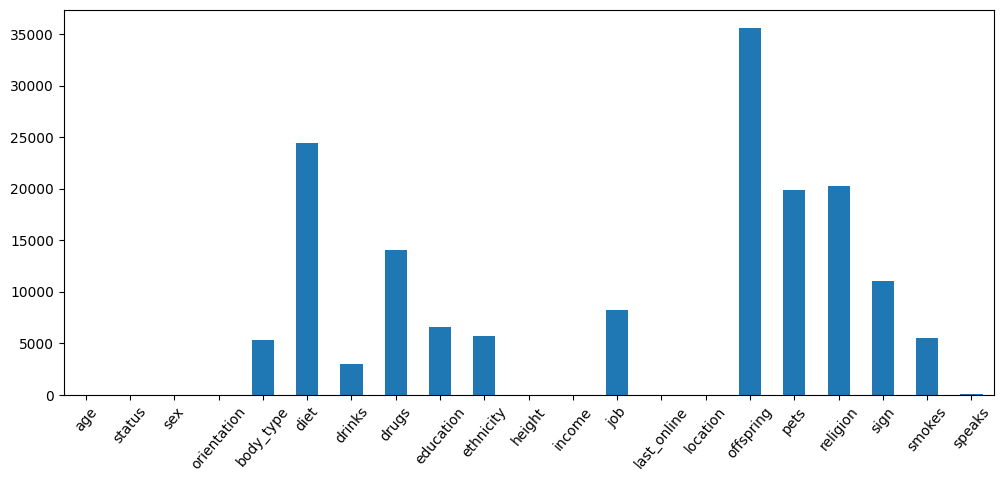

In [7]:
plt.figure(figsize=(12, 5))
df.isna().sum().plot(kind="bar")
plt.xticks(rotation=50)

In [8]:
df1 = df.dropna(subset=['diet', 'drugs','education','age','status','sex','orientation','body_type',
'ethnicity','job','pets'])

In [13]:
def rmissingvaluecol(df1, threshold):
    l = []
    threshold_percentage = 100 * (df1.isnull().sum() / len(df1.index))
    cols_to_keep = df1.loc[:, threshold_percentage < threshold].columns
    l = list(cols_to_keep.values)
    print("# Columns having more than %s percent missing values:" % threshold, (df1.shape[1] - len(l)))
    print("Columns:\n", list(set(list(df1.columns.values)) - set(l)))
    return l


In [14]:
l = rmissingvaluecol(df1, 1)
df2 = df1[l]


# Columns having more than 1 percent missing values: 4
Columns:
 ['sign', 'offspring', 'smokes', 'religion']


In [15]:
df2.head()

,age,status,sex,orientation,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,last_online,location,pets,speaks
0,22,single,m,straight,a little extra,strictly anything,socially,never,working on college/university,"asian, white",75.0,-1,transportation,2012-06-28-20-30,"south san francisco, california",likes dogs and likes cats,english
1,35,single,m,straight,average,mostly other,often,sometimes,working on space camp,white,70.0,80000,hospitality / travel,2012-06-29-21-41,"oakland, california",likes dogs and likes cats,"english (fluently), spanish (poorly), french (..."
7,31,single,f,straight,average,mostly anything,socially,never,graduated from college/university,white,65.0,-1,artistic / musical / writer,2012-06-29-12-30,"san francisco, california",likes dogs and likes cats,"english, spanish (okay)"
9,37,single,m,straight,athletic,mostly anything,not at all,never,working on two-year college,white,65.0,-1,student,2012-06-28-21-08,"san mateo, california",likes dogs and likes cats,english (fluently)
11,28,seeing someone,m,straight,average,mostly anything,socially,never,graduated from college/university,white,72.0,40000,banking / financial / real estate,2012-05-22-17-05,"daly city, california",likes cats,"english (fluently), sign language (poorly)"


In [16]:
def show_percetage(plot, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x()+p.get_width()/2-0.1
        y = p.get_y()+p.get_height()
        ax.annotate(percentage, (x, y), size=10)

<Figure size 1500x700 with 0 Axes>

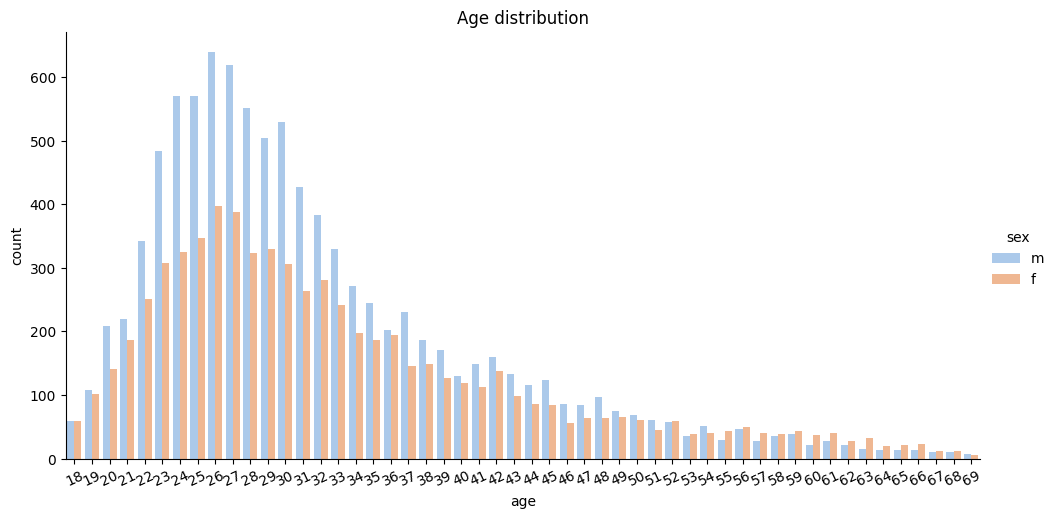

In [17]:
plt.figure(figsize=(15, 7))
sns.catplot(x='age', data = df1, kind='count', palette='pastel', hue='sex', 
            height=5, # make the plot 5 units high
            aspect=2)
plt.xticks(rotation = 25)
plt.title('Age distribution')
plt.show()

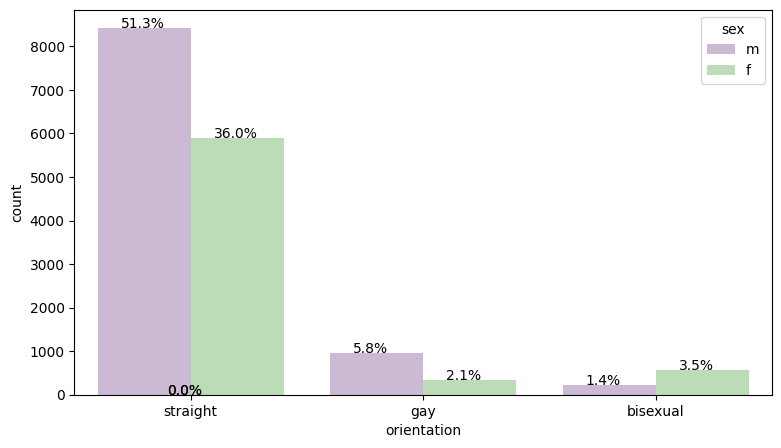

In [18]:
plt.figure(figsize=(9, 5))
ax = sns.countplot(x='orientation', data=df1,
hue='sex',
palette='PRGn',
order=df1['orientation'].value_counts().iloc[:10].index)
total = float(len(df1))
show_percetage(ax, df1)
plt.show()

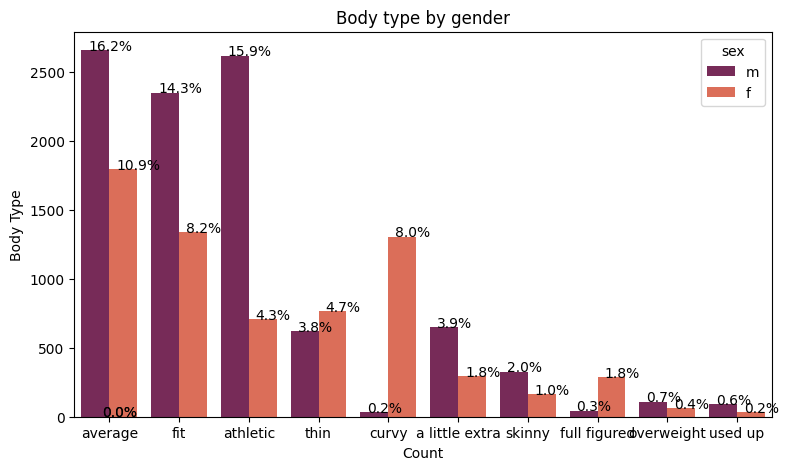

In [19]:
plt.figure(figsize=(9, 5))
ax = sns.countplot(x='body_type', data=df1,
hue='sex',
palette='rocket',
order=df1['body_type'].value_counts().iloc[:10].index)
ax.set_title("Body type by gender")
ax.set(xlabel='Count', ylabel='Body Type')
show_percetage(ax, df1)
plt.show()

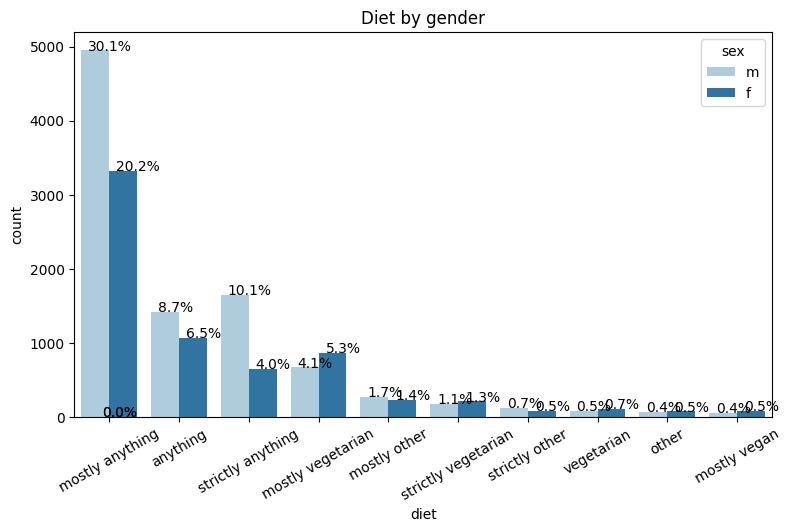

In [20]:
plt.figure(figsize=(9, 5))
ax = sns.countplot(x='diet', data=df1,
hue='sex', palette='Paired',
order = df1['diet'].value_counts().iloc[:10].index)
plt.xticks(rotation = 30)
ax.set_title("Diet by gender")
show_percetage(ax, df1)

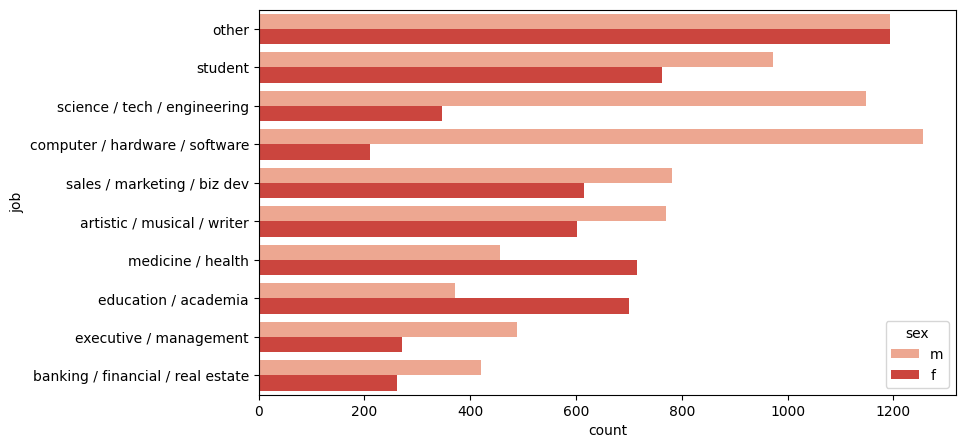

In [21]:
plt.figure(figsize=(9, 5))
sns.countplot(y='job', data=df1,
hue='sex', palette='Reds',
order = df1['job'].value_counts().iloc[:10].index)
plt.show()

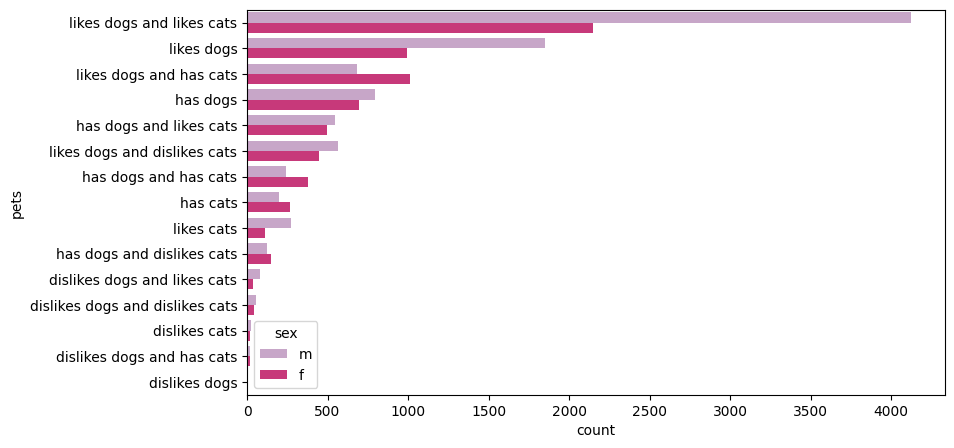

In [22]:
plt.figure(figsize=(9, 5))
sns.countplot(y = 'pets', data=df1,
hue='sex', palette='PuRd',
order=df1['pets'].value_counts().iloc[:].index)
plt.show()

# Conclusion
- Maximun number of male and female profiles are at age of 26.
- Maximun number of male and female profiles are of straight category.
- Maximun number of male profiles are of athletic type.
- Maximun number of female profiles are average type.
- Maximun number of male and female profiles shows that they eat anything for diet.
- Maximun number of male profiles are in computer / hardware / software jobs.
- Maximun number of female profiles are students.
- Maximun number of male and female profiles says that they likes dogs and likes cats.